In [48]:
from pyspark.sql import SQLContext, SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.clustering import KMeans, BisectingKMeans
from kneed import KneeLocator
from pyspark.ml.evaluation import ClusteringEvaluator

In [49]:
spark = SparkSession.Builder().appName('DDAM_Project_Mushrooms').getOrCreate()
sql_ctx = SQLContext(spark)
mushroom_df_cleaned = spark.read.options(inferSchema = True, delimiter = ',', header = True).csv('dataset/cleaned.csv')

/home/fmitola2/.local/lib/python3.9/site-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [50]:
mushroom_df_cleaned.show()
mushroom_df_cleaned.count()

+-----+------------+---------+-----------+---------+--------------------+---------------+----------+-----------+----------+----------+--------+---------+-------+------+
|class|cap-diameter|cap-shape|cap-surface|cap-color|does-bruise-or-bleed|gill-attachment|gill-color|stem-height|stem-width|stem-color|has-ring|ring-type|habitat|season|
+-----+------------+---------+-----------+---------+--------------------+---------------+----------+-----------+----------+----------+--------+---------+-------+------+
|    e|       10.96|        f|          i|        l|                   f|              s|         b|       7.23|     1.915|         b|       f|        f|      l|     a|
|    e|        9.33|        f|          i|        l|                   f|              s|         b|       7.36|     1.894|         b|       f|        f|      d|     w|
|    e|        11.0|        f|          i|        l|                   f|              s|         b|       8.28|     1.988|         u|       f|        f|  

60014

In [51]:
mushroom_df_cleaned.dtypes

[('class', 'string'),
 ('cap-diameter', 'double'),
 ('cap-shape', 'string'),
 ('cap-surface', 'string'),
 ('cap-color', 'string'),
 ('does-bruise-or-bleed', 'string'),
 ('gill-attachment', 'string'),
 ('gill-color', 'string'),
 ('stem-height', 'double'),
 ('stem-width', 'double'),
 ('stem-color', 'string'),
 ('has-ring', 'string'),
 ('ring-type', 'string'),
 ('habitat', 'string'),
 ('season', 'string')]

In [52]:
cat_cols = [element[0] for element in mushroom_df_cleaned.dtypes if element[1] == 'string']
print('The numerical columns are')
print(cat_cols)

The numerical columns are
['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


In [53]:
num_cols = [element[0] for element in mushroom_df_cleaned.dtypes if element[1] != 'string']
print('The numerical columns are')
print(num_cols)

The numerical columns are
['cap-diameter', 'stem-height', 'stem-width']


In [54]:
assembler = VectorAssembler(
    inputCols=num_cols,
    outputCol="num_attrs_clustering")

assembled_df = assembler.transform(mushroom_df_cleaned)

scaler = StandardScaler(withMean=True, withStd=True, inputCol="num_attrs_clustering", outputCol="num_attrs_clustering_scaled")

scaled_df = scaler.fit(assembled_df).transform(assembled_df)

kmeans_df = scaled_df.select("*")
bisecting_kmeans_df = scaled_df.select("*")

# K-Means

Searching best k using elbow method

K: 2
Silhouette (squared euclidean): 0.6209
SSE: 98004.4072

K: 3
Silhouette (squared euclidean): 0.5452
SSE: 75847.8114



K: 4
Silhouette (squared euclidean): 0.4242
SSE: 65660.4198



K: 5
Silhouette (squared euclidean): 0.5101
SSE: 52063.9147



K: 6
Silhouette (squared euclidean): 0.3867
SSE: 55580.0683

K: 7
Silhouette (squared euclidean): 0.3622
SSE: 46804.8584

K: 8
Silhouette (squared euclidean): 0.4310
SSE: 39171.9821



K: 9
Silhouette (squared euclidean): 0.4307
SSE: 33611.8444



K: 10
Silhouette (squared euclidean): 0.3637
SSE: 35879.7772



K: 11
Silhouette (squared euclidean): 0.3597
SSE: 33684.7992



K: 12
Silhouette (squared euclidean): 0.4057
SSE: 26480.5017



K: 13
Silhouette (squared euclidean): 0.3675
SSE: 32018.2140



K: 14
Silhouette (squared euclidean): 0.4018
SSE: 23924.8582



K: 15
Silhouette (squared euclidean): 0.4072
SSE: 23449.1141



K: 16
Silhouette (squared euclidean): 0.3844
SSE: 22194.6284



K: 17
Silhouette (squared euclidean): 0.4071
SSE: 22099.7591



K: 18
Silhouette (squared euclidean): 0.3900
SSE: 21430.9830



K: 19
Silhouette (squared euclidean): 0.4022
SSE: 20028.3991



K: 20
Silhouette (squared euclidean): 0.4030
SSE: 18990.0836



K: 21
Silhouette (squared euclidean): 0.4254
SSE: 17325.3351



K: 22
Silhouette (squared euclidean): 0.4169
SSE: 17589.7834



K: 23
Silhouette (squared euclidean): 0.4068
SSE: 16936.2704



K: 24
Silhouette (squared euclidean): 0.3887
SSE: 17582.3415



K: 25
Silhouette (squared euclidean): 0.3792
SSE: 16990.6155



K: 26
Silhouette (squared euclidean): 0.4207
SSE: 14257.9086



K: 27
Silhouette (squared euclidean): 0.4131
SSE: 13442.3871



K: 28
Silhouette (squared euclidean): 0.4153
SSE: 14295.4241



K: 29
Silhouette (squared euclidean): 0.4202
SSE: 13777.1388



K: 30
Silhouette (squared euclidean): 0.3642
SSE: 15481.3186


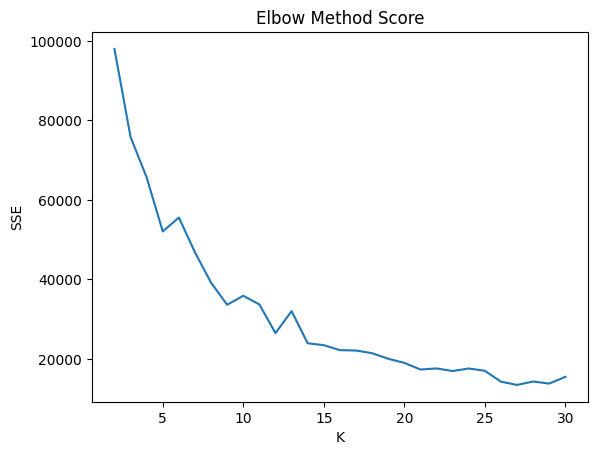

Elbow at K:5


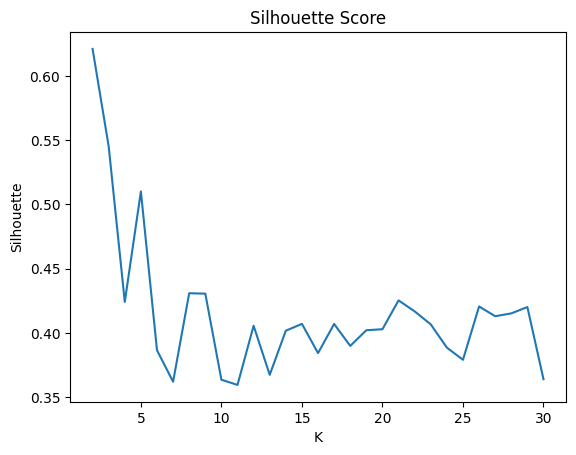

In [55]:
sse_scores = []
silhouette_scores = []

MAX_K = 31

#Trying different k recording sse and silhouette scores

for k in range(2,MAX_K):

    print('')
    kmeans = KMeans(featuresCol="num_attrs_clustering_scaled", k=k, initMode='random')
    model = kmeans.fit(kmeans_df)
    predictions = model.transform(kmeans_df)
    silhouette = ClusteringEvaluator(featuresCol="num_attrs_clustering_scaled").evaluate(predictions)
    sse = model.summary.trainingCost
    
    print(f"K: {k}")
    print(f"Silhouette (squared euclidean): {silhouette:.4f}")
    print(f"SSE: {sse:.4f}")
    sse_scores.append(sse)
    silhouette_scores.append(silhouette)


plt.figure()
plt.plot(range(2, MAX_K), sse_scores)
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Method Score")
plt.show()


kl = KneeLocator(range(2, MAX_K), sse_scores, curve="convex", direction="decreasing")
print(f"Elbow at K:{kl.elbow}")

plt.figure()
plt.plot(range(2, MAX_K), silhouette_scores)
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.title("Silhouette Score")
plt.show()

Retraining K-means using the best k found

In [56]:
kmeans=KMeans(featuresCol="num_attrs_clustering_scaled",k=5, initMode='random')
model = kmeans.fit(kmeans_df)
predictions = model.transform(kmeans_df)

silhouette = ClusteringEvaluator(featuresCol="num_attrs_clustering_scaled").evaluate(predictions)
sse = model.summary.trainingCost

print(f"Silhouette: {silhouette}")
print(f"SSE: {sse}")

Silhouette: 0.5101179076346803
SSE: 52063.91471972959


Distribution analysis

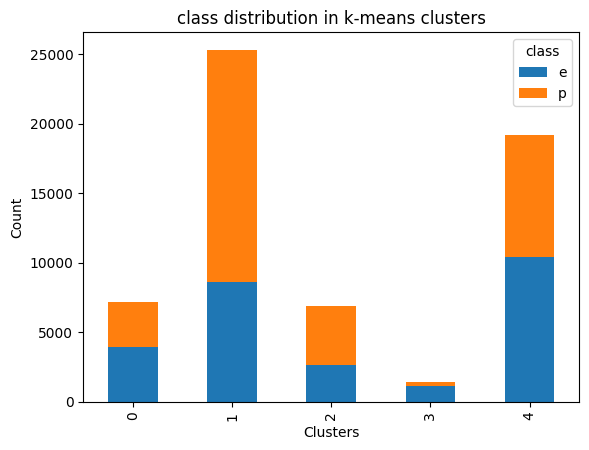

In [57]:
counts = predictions.groupBy('prediction', 'class').count().toPandas()
counts = counts.pivot(index='prediction', columns='class', values='count')
counts.plot(kind='bar', stacked=True, title='class distribution in k-means clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

# Bisecting k-means

Searching best k using elbow method

K: 2
Silhouette (squared euclidean): 0.6209
SSE: 98004.4071



K: 3
Silhouette (squared euclidean): 0.3317
SSE: 84611.5767



K: 4
Silhouette (squared euclidean): 0.4056
SSE: 64605.1191



K: 5
Silhouette (squared euclidean): 0.3047
SSE: 61356.4439

K: 6
Silhouette (squared euclidean): 0.2628
SSE: 58438.1817

K: 7
Silhouette (squared euclidean): 0.3117
SSE: 48131.9982



K: 8
Silhouette (squared euclidean): 0.3216
SSE: 41209.5108



K: 9
Silhouette (squared euclidean): 0.2669
SSE: 40319.8821

K: 10
Silhouette (squared euclidean): 0.2326
SSE: 39363.6475

K: 11
Silhouette (squared euclidean): 0.2438
SSE: 35857.1196



K: 12
Silhouette (squared euclidean): 0.2488
SSE: 34944.6557



K: 13
Silhouette (squared euclidean): 0.2589
SSE: 33766.8789



K: 14
Silhouette (squared euclidean): 0.2556
SSE: 30105.5987



K: 15
Silhouette (squared euclidean): 0.2565
SSE: 28695.4193



K: 16
Silhouette (squared euclidean): 0.2613
SSE: 26254.6481



K: 17
Silhouette (squared euclidean): 0.2258
SSE: 25756.5985



K: 18
Silhouette (squared euclidean): 0.1894
SSE: 25217.2448



K: 19
Silhouette (squared euclidean): 0.1892
SSE: 24762.7944



K: 20
Silhouette (squared euclidean): 0.2359
SSE: 23590.4358



K: 21
Silhouette (squared euclidean): 0.2608
SSE: 20637.8984



K: 22
Silhouette (squared euclidean): 0.2719
SSE: 20407.4880



K: 23
Silhouette (squared euclidean): 0.2548
SSE: 20232.8737



K: 24
Silhouette (squared euclidean): 0.2366
SSE: 20119.8882



K: 25
Silhouette (squared euclidean): 0.2504
SSE: 18942.0340



K: 26
Silhouette (squared euclidean): 0.2592
SSE: 18436.1292



K: 27
Silhouette (squared euclidean): 0.2658
SSE: 18194.3855



K: 28
Silhouette (squared euclidean): 0.2698
SSE: 17133.3879



K: 29
Silhouette (squared euclidean): 0.2660
SSE: 16728.6606



K: 30
Silhouette (squared euclidean): 0.2672
SSE: 16305.5110


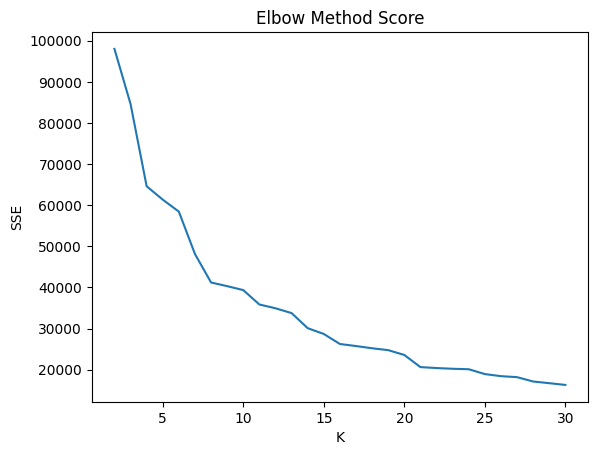

Elbow at K:8


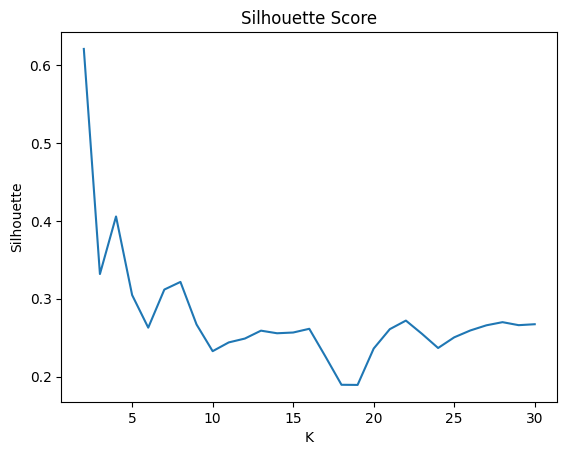

In [58]:
sse_scores = []
silhouette_scores = []

MAX_K = 31

#Trying different k recording sse and silhouette scores

for k in range(2,MAX_K):

    print('')
    bis_kmeans = BisectingKMeans(featuresCol="num_attrs_clustering_scaled", k=k)
    model = bis_kmeans.fit(bisecting_kmeans_df)
    predictions = model.transform(bisecting_kmeans_df)
    silhouette = ClusteringEvaluator(featuresCol="num_attrs_clustering_scaled").evaluate(predictions)
    sse = model.summary.trainingCost
    
    print(f"K: {k}")
    print(f"Silhouette (squared euclidean): {silhouette:.4f}")
    print(f"SSE: {sse:.4f}")
    sse_scores.append(sse)
    silhouette_scores.append(silhouette)


plt.figure()
plt.plot(range(2, MAX_K), sse_scores)
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Method Score")
plt.show()


kl = KneeLocator(range(2, MAX_K), sse_scores, curve="convex", direction="decreasing")
print(f"Elbow at K:{kl.elbow}")

plt.figure()
plt.plot(range(2, MAX_K), silhouette_scores)
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.title("Silhouette Score")
plt.show()

Retraining Bisecting K-means using optimal k

In [73]:
bis_kmeans=BisectingKMeans(featuresCol="num_attrs_clustering_scaled",k=8)

bis_model = bis_kmeans.fit(bisecting_kmeans_df)
bis_predictions_retrained = bis_model.transform(bisecting_kmeans_df)

eval = ClusteringEvaluator(featuresCol="num_attrs_clustering_scaled")
bis_silhouette = eval.evaluate(bis_predictions_retrained)

print(f"Silhouette: {bis_silhouette}")
print(f"SSE: {bis_model.summary.trainingCost}")

Silhouette: 0.32155160231379015
SSE: 41209.510801381526


Distribution analysis

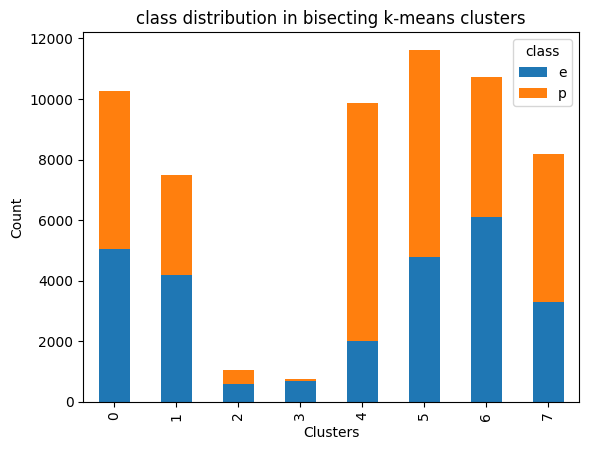

In [74]:
counts = bis_predictions_retrained.groupBy('prediction', 'class').count().toPandas()
counts = counts.pivot(index='prediction', columns='class', values='count')
counts.plot(kind='bar', stacked=True, title='class distribution in bisecting k-means clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()